#  Merging DataFrames with pandas
### Course Description
As a data scientist, you'll often find that the data you need is not in a single file. It may be spread across a number of text files, spreadsheets, or databases. You’ll want to be able to import the data you’re interested in as a collection of DataFrames and combine them to answer your central questions. This course is all about the act of combining—or merging—DataFrames, an essential part of any data scientist's toolbox. You'll hone your pandas skills by learning how to organize, reshape, and aggregate multiple datasets to answer your specific questions.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from glob import glob


# 1. Preparing data

In this chapter, you'll learn about different techniques you can use to import multiple files into DataFrames. Having imported your data into individual DataFrames, you'll then learn how to share information between DataFrames using their indexes. Understanding how indexes work is essential to merging DataFrames, which you’ll learn later in the course.

In [2]:
# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Data/Summer Olympic medals/Bronze.csv')

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Data/Summer Olympic medals/Silver.csv')

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Data/Summer Olympic medals/Gold.csv')

# Print the first five rows of gold
print(gold.head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


In [3]:
# Create the list of file names: filenames
filenames = ['Gold.csv', 'Silver.csv', 'Bronze.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv('Data/Summer Olympic medals/' + filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


In [4]:
# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


In [5]:
# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv('Data/monthly_max_temp.csv', index_col='Month')

# Print the head of weather1
print(weather1.head())

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending= False)

# Print the head of weather3
print(weather3.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

# Print the head of weather4
print(weather4.head())

       Max TemperatureF
Month                  
Apr                  84
Aug                  86
Dec                  68
Feb                  60
Jan                  68
       Max TemperatureF
Month                  
Apr                  84
Aug                  86
Dec                  68
Feb                  60
Jan                  68
       Max TemperatureF
Month                  
Sep                  90
Oct                  84
Nov                  72
May                  88
Mar                  68
       Max TemperatureF
Month                  
Feb                  60
Dec                  68
Jan                  68
Mar                  68
Nov                  72


In [6]:
year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

# Print weather2
print(weather2)

# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill()

# Print weather3
print(weather3)

       Max TemperatureF
Month                  
Jan                  68
Feb                  60
Mar                  68
Apr                  84
May                  88
Jun                  89
Jul                  91
Aug                  86
Sep                  90
Oct                  84
Nov                  72
Dec                  68
       Max TemperatureF
Month                  
Jan                  68
Feb                  60
Mar                  68
Apr                  84
May                  88
Jun                  89
Jul                  91
Aug                  86
Sep                  90
Oct                  84
Nov                  72
Dec                  68


In [7]:
names_1881 = pd.read_csv('Data/names1881.csv', index_col=['name', 'gender'], names = ['name', 'gender', 'count'] )
names_1981 = pd.read_csv('Data/names1981.csv', index_col=['name', 'gender'], names = ['name', 'gender', 'count'] )

In [8]:
# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)


(1935, 1)
(1587, 1)


In [9]:
weather = pd.read_csv('Data/pittsburgh2013.csv', parse_dates=True, index_col='Date')

In [10]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF', 'Mean TemperatureF', 'Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())

            Min TemperatureC  Mean TemperatureC  Max TemperatureC
Date                                                             
2013-01-01         -6.111111          -2.222222          0.000000
2013-01-02         -8.333333          -6.111111         -3.888889
2013-01-03         -8.888889          -4.444444          0.000000
2013-01-04         -2.777778          -2.222222         -1.111111
2013-01-05         -3.888889          -1.111111          1.111111


In [11]:
# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('Data/GDP/gdp_usa.csv', parse_dates=True, index_col='DATE')

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp.loc['2008':]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

# Print yearly
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change()*100

# Print yearly again
print(yearly)

              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5
              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5
              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


In [12]:
# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('Data/sp500.csv', parse_dates=True, index_col='Date')

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('Data/exchange.csv', parse_dates=True, index_col='Date')

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open', 'Close']]

# Print the head of dollars
print(dollars.head())

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis = 'rows')

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893
                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


# 2. Concatenating data

You'll learn how to perform database-style operations to combine DataFrames. In particular, you'll learn about appending and concatenating DataFrames while working with a variety of real-world datasets.

In [13]:
names_1881 = names_1881.reset_index()
names_1981 = names_1981.reset_index()
# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981,ignore_index=True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)

# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names.name == 'Morgan'])



(19455, 4)
(1935, 4)
(21390, 4)
         name gender  count  year
1283   Morgan      M     23  1881
2096   Morgan      F   1769  1981
14390  Morgan      M    766  1981


In [14]:

medal_types = ['bronze', 'silver', 'gold']
#Initialize an empyy list: medals
medals =[]

for medal in medal_types:
    # Create the file name: file_name
    file_name = "Data/Summer Olympic medals/%s_top5.csv" % medal
    # Create list of column names: columns
    columns = ['Country', medal]
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, header=0,names=columns, index_col='Country')
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals_df
medals_df = pd.concat(medals, axis='columns')

# Print medals_df
print(medals_df)

                bronze  silver    gold
United States   1052.0  1195.0  2088.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
France           475.0   461.0     NaN
Germany          454.0     NaN   407.0
Italy              NaN   394.0   460.0


In [15]:
medals = []
for medal in medal_types:

    file_name = "Data/Summer Olympic medals/%s_top5.csv" % medal
    
    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name,index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)
    
# Concatenate medals: medals
medals = pd.concat(medals, keys = ['bronze', 'silver', 'gold'],axis = 0)

# Print medals in entirety
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


In [16]:
# Sort the entries of medals: medals_sorted
medals_sorted = medals.sort_index(level=0)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
# print(medals_sorted.loc[idx[:,'United Kingdom'], :])
print(medals_sorted.loc[idx[:,'United Kingdom'], :])

Total    454.0
Name: (bronze, Germany), dtype: float64
                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0
                       Total
       Country              
bronze United Kingdom  505.0
gold   United Kingdom  498.0
silver United Kingdom  591.0


In [17]:
dataframes = [pd.read_csv('Data/Sales/feb-sales-Hardware.csv', parse_dates=True, index_col='Date'),pd.read_csv('Data/Sales/feb-sales-Software.csv', parse_dates=True, index_col='Date'),pd.read_csv('Data/Sales/feb-sales-Service.csv', parse_dates=True, index_col='Date')]

In [18]:
dataframes

[                             Company   Product  Units
 Date                                                 
 2015-02-04 21:52:45  Acme Coporation  Hardware     14
 2015-02-07 22:58:10  Acme Coporation  Hardware      1
 2015-02-19 10:59:33        Mediacore  Hardware     16
 2015-02-02 20:54:49        Mediacore  Hardware      9
 2015-02-21 20:41:47            Hooli  Hardware      3,
                              Company   Product  Units
 Date                                                 
 2015-02-16 12:09:19            Hooli  Software     10
 2015-02-03 14:14:18          Initech  Software     13
 2015-02-02 08:33:01            Hooli  Software      3
 2015-02-05 01:53:06  Acme Coporation  Software     19
 2015-02-11 20:03:08          Initech  Software      7
 2015-02-09 13:09:55        Mediacore  Software      7
 2015-02-11 22:50:44            Hooli  Software      4
 2015-02-04 15:36:29        Streeplex  Software     13
 2015-02-21 05:01:26        Mediacore  Software      3,
        

In [19]:
# Concatenate dataframes: february
february = pd.concat(dataframes,keys=['Hardware', 'Software', 'Service'], axis = 1)

# Print february.info()
print(february.info())

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
slice_2_8 = february.loc[ 'Feb. 2, 2015':'Feb. 8, 2015', idx[:, 'Company']]

# Print slice_2_8
print(slice_2_8)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-02 08:33:01 to 2015-02-26 08:58:51
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Hardware, Company)  5 non-null      object 
 1   (Hardware, Product)  5 non-null      object 
 2   (Hardware, Units)    5 non-null      float64
 3   (Software, Company)  9 non-null      object 
 4   (Software, Product)  9 non-null      object 
 5   (Software, Units)    9 non-null      float64
 6   (Service, Company)   6 non-null      object 
 7   (Service, Product)   6 non-null      object 
 8   (Service, Units)     6 non-null      float64
dtypes: float64(3), object(6)
memory usage: 1.6+ KB
None
                            Hardware         Software Service
                             Company          Company Company
Date                                                         
2015-02-02 08:33:01              NaN            Hooli     NaN
2015-

In [20]:
jan, feb , mar = (pd.read_csv('Data/Sales/sales-jan-2015.csv', parse_dates=True), 
                   pd.read_csv('Data/Sales/sales-feb-2015.csv', parse_dates=True),
                   pd.read_csv('Data/Sales/sales-mar-2015.csv', parse_dates=True))


In [21]:
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

# Concatenate data in month_dict: sales
sales =pd.concat(month_dict)

# Print sales
print(sales)

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                          Units
         Company               
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40
                    Units
         Company         
january  Mediacore     15
february Mediacore     45
march    Mediacore     68


In [22]:
# Create the list of DataFrames: medal_list
medal_list = [bronze.set_index('Country').Total, silver.set_index('Country').Total, gold.set_index('Country').Total]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], join='inner', axis = 1)

# Print medals
print(medals)


                      bronze  silver    gold
Country                                     
United States         1052.0  1195.0  2088.0
Soviet Union           584.0   627.0   838.0
United Kingdom         505.0   591.0   498.0
France                 475.0   461.0   378.0
Germany                454.0   350.0   407.0
...                      ...     ...     ...
Senegal                  NaN     1.0     NaN
Sudan                    NaN     1.0     NaN
Tonga                    NaN     1.0     NaN
Burundi                  NaN     NaN     1.0
United Arab Emirates     NaN     NaN     1.0

[138 rows x 3 columns]


In [23]:
bronze.set_index('Country').Total

Country
United States           1052.0
Soviet Union             584.0
United Kingdom           505.0
France                   475.0
Germany                  454.0
                         ...  
Senegal                    NaN
Sudan                      NaN
Tonga                      NaN
Burundi                    NaN
United Arab Emirates       NaN
Name: Total, Length: 138, dtype: float64

In [24]:
china = pd.read_csv('Data/GDP/gdp_china.csv', index_col= 'Year', parse_dates=True).rename(columns={'GDP': 'China'})
us = pd.read_csv('Data/GDP/gdp_usa.csv', index_col= 'DATE', parse_dates=True).rename(columns={'VALUE':'Us'})

In [25]:
# Resample and tidy china: china_annual
china_annual = china.resample('A').last().pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample('A').last().pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual,us_annual], join='inner', axis = 1)

# Resample gdp and print
print(gdp.resample('10A').last())

               China        Us
Year                          
1970-12-31  0.546128  1.017187
1980-12-31  1.072537  1.742556
1990-12-31  0.892820  1.012126
2000-12-31  2.357522  0.738632
2010-12-31  4.011081  0.454332
2020-12-31  3.789936  0.361780


# 3. Merging data

You'll learn all about merging pandas DataFrames. You'll explore different techniques for merging, and learn about left joins, right joins, inner joins, and outer joins, as well as when to use which. You'll also learn about ordered merging, which is useful when you want to merge DataFrames with columns that have natural orderings, like date-time columns.

In [26]:
revenue = pd.read_csv('Data/revenue.csv', index_col=0)
managers = pd.read_csv('Data/managers.csv', index_col=0)

In [27]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue,managers, on = 'city')

# Print merge_by_city
print(merge_by_city)

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue,managers, on = 'branch_id')

# Print merge_by_id
print(merge_by_id)

   branch_id_x         city  revenue  branch_id_y  manager
0           10       Austin      100           10  Charles
1           20       Denver       83           20     Joel
2           30  Springfield        4           31    Sally
3           47    Mendocino      200           47    Brett
   branch_id     city_x  revenue     city_y  manager
0         10     Austin      100     Austin  Charles
1         20     Denver       83     Denver     Joel
2         47  Mendocino      200  Mendocino    Brett


In [28]:
managers

,branch_id,city,manager
0,10,Austin,Charles
1,20,Denver,Joel
2,47,Mendocino,Brett
3,31,Springfield,Sally


# 4. Case Study - Summer Olympics

To reinforce your new skills, you'll apply them to an in-depth case study using Olympic medal data. The analysis involves integrating your multi-DataFrame skills from this course and skills you've gained in previous pandas courses. This is a rich dataset that will allow you to fully leverage your pandas data manipulation skills.

### Loading Olympic edition DataFrame
In this chapter, you'll be using The Guardian's Olympic medal dataset.

Your first task here is to prepare a DataFrame editions from a tab-separated values (TSV) file.

Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: 'Edition', 'Bronze', 'Gold', 'Silver', 'Grand Total', 'City', and 'Country'.

For the analysis that follows, you won't need the overall medal counts, so you want to keep only the useful columns from editions: 'Edition', 'Grand Total', City, and Country.

#### Instructions

- Read file_path into a DataFrame called editions. The identifier file_path has been pre-defined with the filename 'Summer Olympic medallists 1896 to 2008 - EDITIONS.tsv'. You'll have to use the option sep='\t' because the file uses tabs to delimit fields (pd.read_csv() expects commas by default).
- Select only the columns 'Edition', 'Grand Total', 'City', and 'Country' from editions.
- Print the final DataFrame editions in entirety (there are only 26 rows). This has been done for you, so hit 'Submit Answer' to see the result!

In [29]:
# Create file path: file_path
file_path = 'Data/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep = '\t')

# Extract the relevant columns: editions
editions = editions[['Edition','Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions)

    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

### Loading IOC codes DataFrame
Your task here is to prepare a DataFrame ioc_codes from a comma-separated values (CSV) file.

Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.

For the analysis that follows, you want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' (the column 'NOC' contains three-letter codes representing each country).

#### Instructions

- Read file_path into a DataFrame called ioc_codes. The identifier file_path has been pre-defined with the filename 'Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv'.
- Select only the columns 'Country' and 'NOC' from ioc_codes.
- Print the leading 5 and trailing 5 rows of the DataFrame ioc_codes (there are 200 rows in total). This has been done for you, so hit 'Submit Answer' to see the result!

In [30]:

# Create the file path: file_path
file_path = 'Data/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


### Building medals DataFrame
Here, you'll start with the DataFrame editions from the previous exercise.

You have a sequence of files summer_1896.csv, summer_1900.csv, ..., summer_2008.csv, one for each Olympic edition (year).

You will build up a dictionary medals_dict with the Olympic editions (years) as keys and DataFrames as values.

The dictionary is built up inside a loop over the year of each Olympic edition (from the Index of editions).

Once the dictionary of DataFrames is built up, you will combine the DataFrames using pd.concat().

#### Instructions

- Within the for loop:
    - Create the file path. This has been done for you.
    - Read file_path into a DataFrame. Assign the result to the year key of medals_dict.
    - Select only the columns 'Athlete', 'NOC', and 'Medal' from medals_dict[year].
    - Create a new column called 'Edition' in the DataFrame medals_dict[year] whose entries are all year.
- Concatenate the dictionary of DataFrames medals_dict into a DataFame called medals. Specify the keyword argument ignore_index=True to prevent repeated integer indices.
- Print the first and last 5 rows of medals. This has been done for you, so hit 'Submit Answer' to see the result!

In [31]:
medals = pd.read_csv('Data/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', 
            sep = '\t', header=4, usecols=['Athlete', 'NOC', 'Medal', 'Edition'])

### Counting medals by country/edition in a pivot table
Here, you'll start with the concatenated DataFrame medals from the previous exercise.

You can construct a pivot table to see the number of medals each country won in each year. The result is a new DataFrame with the Olympic edition on the Index and with 138 country NOC codes as columns. If you want a refresher on pivot tables, it may be useful to refer back to the relevant exercises in Manipulating DataFrames with pandas.

#### Instructions

- Construct a pivot table from the DataFrame medals, aggregating by count (by specifying the aggfunc parameter). Use 'Edition' as the index, 'Athlete' for the values, and 'NOC' for the columns.
- Print the first & last 5 rows of medal_counts. This has been done for you, so hit 'Submit Answer' to see the results!

In [32]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index = 'Edition',values =  'Athlete', columns='NOC', aggfunc = 'count')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...  URS  URU  \
Edition                                                      ...             
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...  NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...  NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...  NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]
NOC      AFG  AHO  ALG  ANZ   ARG  ARM    AUS  AUT  AZE  B

### Computing fraction of medals per Olympic edition
In this exercise, you'll start with the DataFrames editions, medals, & medal_counts from prior exercises.

You can extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame medal_counts can be divided row-wise by the total number of medals awarded each edition; the method .divide() performs the broadcast as you require.

This gives you a normalized indication of each country's performance in each edition.

#### Instructions

- Set the index of the DataFrame editions to be 'Edition' (using the method .set_index()). Save the result as totals.
- Extract the 'Grand Total' column from totals and assign the result back to totals.
- Divide the DataFrame medal_counts by totals along each row. You will have to use the .divide() method with the option axis='rows'. Assign the result to fractions.
- Print first & last 5 rows of the DataFrame fractions. This has been done for you, so hit 'Submit Answer' to see the results!

In [33]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = editions['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis = 'rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC  AFG  AHO  ALG  ANZ  ARG  ARM  AUS  AUT  AZE  BAH  ...  URS  URU  USA  \
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

NOC  UZB  VEN  VIE  YUG  ZAM  ZIM  ZZX  
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 138 columns]
NOC   AFG  AHO  ALG  ANZ  ARG  ARM  AUS  AUT  AZE  BAH  ...  URS  URU  USA  \
1992  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1996  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2000  NaN  NaN  NaN  NaN  NaN  Na

### Computing fraction of medals per Olympic edition
In this exercise, you'll start with the DataFrames editions, medals, & medal_counts from prior exercises.

You can extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame medal_counts can be divided row-wise by the total number of medals awarded each edition; the method .divide() performs the broadcast as you require.

This gives you a normalized indication of each country's performance in each edition.

#### Instructions

- Set the index of the DataFrame editions to be 'Edition' (using the method .set_index()). Save the result as totals.
- Extract the 'Grand Total' column from totals and assign the result back to totals.
- Divide the DataFrame medal_counts by totals along each row. You will have to use the .divide() method with the option axis='rows'. Assign the result to fractions.
- Print first & last 5 rows of the DataFrame fractions. This has been done for you, so hit 'Submit Answer' to see the results!

In [34]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis = 'rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  ...  \
Edition                                                                   ...   
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN  ...   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN  ...   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN  ...   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN  ...   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN  ...   

NOC      URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition                                                              
1896     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN       NaN  
1912     NaN

### Computing percentage change in fraction of medals won
Here, you'll start with the DataFrames editions, medals, medal_counts, & fractions from prior exercises.

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of the pandas documentation has additional information.

#### Instructions

- Create mean_fractions by chaining the methods .expanding().mean() to fractions.
- Compute the percentage change in mean_fractions down each column by applying .pct_change() and multiplying by 100. Assign the result to fractions_change.
- Reset the index of fractions_change using the .reset_index() method. This will make 'Edition' an ordinary column.
- Print the first and last 5 rows of the DataFrame fractions_change. This has been done for you, so hit 'Submit Answer' to see the results!

In [35]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index('Edition')

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC  ...  URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0    ...  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1    ...  NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2    ...  NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3    ...  NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4    ...  NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AHO        ALG  ANZ       ARG        A

### Building hosts DataFrame
Your task here is to prepare a DataFrame hosts by left joining editions and ioc_codes.

Once created, you will subset the Edition and NOC columns and set Edition as the Index.

There are some missing NOC values; you will set those explicitly.

Finally, you'll reset the Index & print the final DataFrame.

#### Instructions

- Create the DataFrame hosts by doing a left join on DataFrames editions and ioc_codes (using pd.merge()).
- Clean up hosts by subsetting and setting the Index.
- Extract the columns 'Edition' and 'NOC'.
- Set 'Edition' column as the Index.
- Use the .loc[] accessor to find and assign the missing values to the 'NOC' column in hosts. This has been done for you.
- Reset the index of hosts using .reset_index(), which you'll need to save as the hosts DataFrame.
- Hit 'Submit Answer' to see what hosts looks like!

In [36]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions,ioc_codes, how = 'left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition', 'NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


#### Reshaping for analysis
This exercise starts off with fractions_change and hosts already loaded.

Your task here is to reshape the fractions_change DataFrame for later analysis.

Initially, fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with pd.melt(), as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

#### Instructions

- Create a DataFrame reshaped by reshaping the DataFrame fractions_change with pd.melt().
- You'll need to use the keyword argument id_vars='Edition' to set the identifier variable.
- You'll also need to use the keyword argument value_name='Change' to set the measured variables.
- Print the shape of the DataFrames reshaped and fractions_change. This has been done for you.
- Create a DataFrame chn by extracting all the rows from reshaped in which the three letter code for each country ('NOC') is 'CHN'.
- Print the last 5 rows of the DataFrame chn using the .tail() method. This has been done for you, so hit 'Submit Answer' to see the results!

In [37]:
# Reshape fractions_change: reshaped
reshaped = fractions_change.melt(id_vars='Edition',value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped.NOC == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


### Merging to compute influence
This exercise starts off with the DataFrames reshaped and hosts in the namespace.

Your task is to merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.

#### Instructions

- Merge reshaped and hosts using an inner join. Remember, how='inner' is the default behavior for pd.merge().
- Print the first 5 rows of the DataFrame merged. This has been done for you. You should see that the rows are jumbled chronologically.
- Set the index of merged to be 'Edition' and sort the index.
- Print the first 5 rows of the DataFrame influence. This has been done for you, so hit 'Submit Answer' to see the results!

In [38]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how = 'inner')

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


### Plotting influence of host country
This final exercise starts off with the DataFrames influence and editions in the namespace. Your job is to plot the influence of being a host country.

#### Instructions

- Create a Series called change by extracting the 'Change' column from influence.
- Create a bar plot of change using the .plot() method with kind='bar'. Save the result as ax to permit further customization.
- Customize the bar plot of change to improve readability:
- Apply the method .set_ylabel("% Change of Host Country Medal Count") toax.
- Apply the method .set_title("Is there a Host Country Advantage?") to ax.
- Apply the method .set_xticklabels(editions['City']) to ax.
- Reveal the final plot using plt.show().

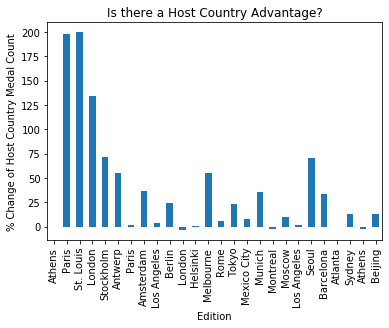

In [39]:
# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind = 'bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()